In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:

class KMeans:
    def __init__(self, k=3, max_iters=300, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """随机初始化质心"""
        indices = np.random.choice(X.shape[0], self.k, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """分配样本到最近的质心"""
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """更新质心位置"""
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.k)])
        return new_centroids

    def fit(self, X):
        """训练模型"""
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iters):
            old_centroids = self.centroids.copy()
            self.labels = self._assign_clusters(X)
            self.centroids = self._update_centroids(X, self.labels)

            # 收敛判断
            if np.linalg.norm(self.centroids - old_centroids) < self.tol:
                break

        return self

    def predict(self, X):
        """预测新数据"""
        return self._assign_clusters(X)

    def calculate_wcss(self, X):
        """计算簇内平方误差和"""
        return sum(np.linalg.norm(X[self.labels == i] - self.centroids[i]) ** 2
                   for i in range(self.k))


In [3]:
# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
wcss = []
k_range = range(1, 11)

In [5]:
for k in k_range:
    model = KMeans(k=k)
    model.fit(X_scaled)
    wcss.append(model.calculate_wcss(X_scaled))

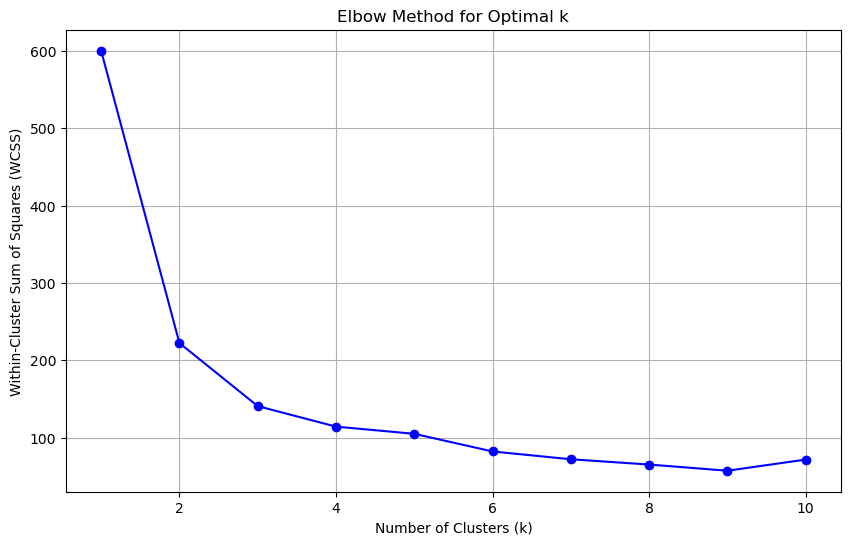

In [6]:
# 可视化肘部法则
plt.figure(figsize=(10,6))
plt.plot(k_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [7]:
# 选择k=3进行训练
kmeans = KMeans(k=3)
kmeans.fit(X_scaled)
labels = kmeans.labels

In [8]:
# 轮廓系数评估
silhouette_avg = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.457


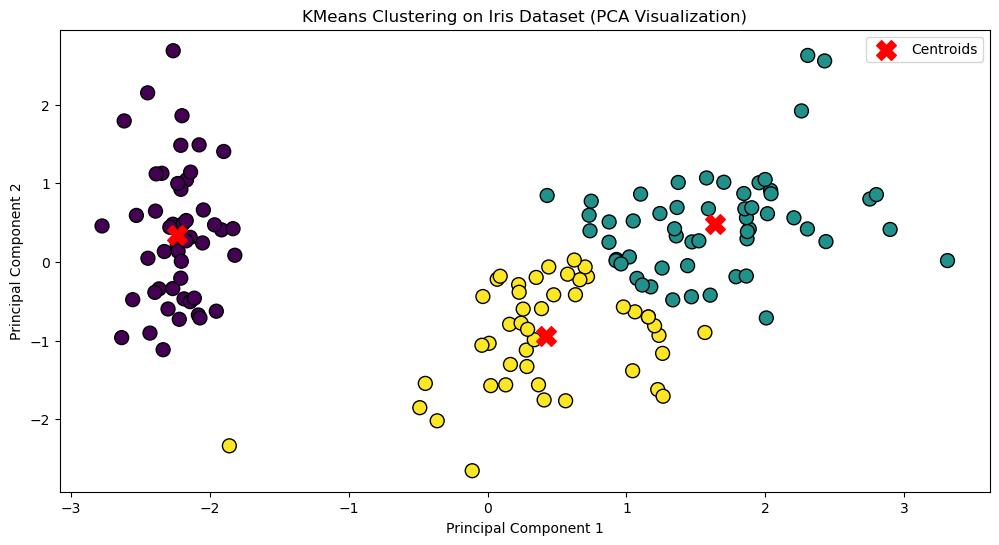

In [9]:
# 使用PCA降维可视化
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(12,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', edgecolor='k', s=100)
plt.scatter(kmeans.centroids.dot(pca.components_.T)[:,0],
            kmeans.centroids.dot(pca.components_.T)[:,1],
            marker='X', s=200, c='red', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KMeans Clustering on Iris Dataset (PCA Visualization)')
plt.legend()
plt.show()